# 3. 어떻게 가치를 근사하여 평가할 것인가?
## TD Learning (SARSA vs Q-Learning)
### Example : Cliff Walking
#### Source
1. 예제 및 Pseudo Code from [Sutton et al. Reinforcement Learning: An Introduction]
2. Original Code from [https://github.com/dennybritz/reinforcement-learning]

<img src="img/cw_ex.png" width="50%" height="50%" title="cliff_walking" alt="cliff_walking"></img>

In [1]:
%matplotlib inline
import itertools
import matplotlib
import numpy as np
import pandas as pd
import sys
import random

from collections import defaultdict
from utils import plot_episode_stats, EpisodeStats, CliffWalkingEnv

matplotlib.style.use('ggplot')
random.seed(100)
np.random.seed(100)

In [2]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

<img src="img/sarsa.png" width="50%" height="50%" title="SARSA" alt="SARSA"></img>

In [3]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    
    # plot을 위한 rewards /per episode 저장용 Container
    stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    Q = defaultdict(lambda: np.zeros(env.action_space.n))  # key가 존재하지 않을 땐 [0,0,0,0]으로 value지정하여 추가
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)  # Qvalues initialization
    
    for i_episode in range(num_episodes):
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        

        state = env.reset()  # 시뮬레이터 리셋!
        action_probs = policy(state)  # Initial 상황에 대한 Action 선택
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        for t in itertools.count():
            next_state, reward, done, _ = env.step(action)  # 시뮬레이션 한 스텝 이동
            next_action_probs = policy(next_state)  # policy를 통해서 다음 스텝의 Action prob 구하기
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)  # Epsilon Greedy
            
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action]  
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
    
            if done:
                break
                
            action = next_action
            state = next_state        
    
    return Q, stats

<img src="img/qlearning.png" width="50%" height="50%" title="SARSA" alt="SARSA"></img>

In [4]:
def q_learning(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.1):

    stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))    

    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        if (i_episode + 1) % 100 == 0:
            print("\rEpisode {}/{}.".format(i_episode + 1, num_episodes), end="")
            sys.stdout.flush()
        
        state = env.reset()
        for t in itertools.count():
            
            action_probs = policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done, _ = env.step(action)

            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
                
            if done:
                break
                
            state = next_state
    
    return Q, stats

In [5]:
env = CliffWalkingEnv()
print(env.action_space.n)

4


In [6]:
Q_sarsa, stats_sarsa = sarsa(env, 500)

Episode 500/500.

In [7]:
Q_learning, stats_qlearning = q_learning(env, 500)

Episode 500/500.

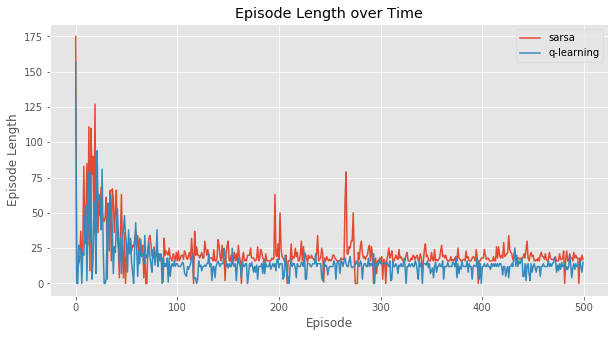

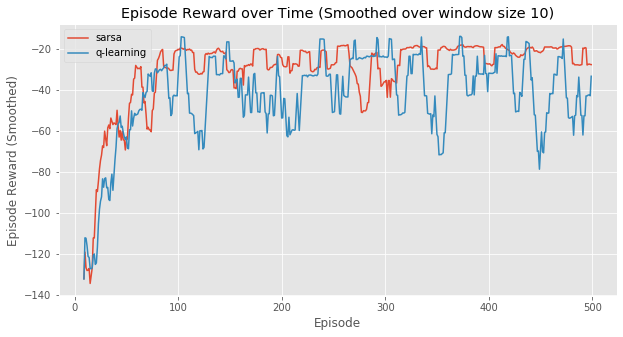

(<Figure size 720x360 with 1 Axes>, <Figure size 720x360 with 1 Axes>)

In [8]:
plot_episode_stats(stats1=stats_sarsa, 
                            stats1_label='sarsa', 
                            stats2=stats_qlearning,
                            stats2_label='q-learning')